In [1]:
import sympy as sym
import numpy as np
import cloudpickle

In [2]:
m = [0]*3

with open("Feasible_Solution/2/steady-state.pkl", "rb") as f:
    m[1] = cloudpickle.load(f)
    
with open("Feasible_Solution/2/accel.pkl", "rb") as f:
    m[0] = cloudpickle.load(f)
    
with open("Feasible_Solution/2/decel.pkl", "rb") as f:
    m[2] = cloudpickle.load(f)
    
    
N = m[0].N[-1]

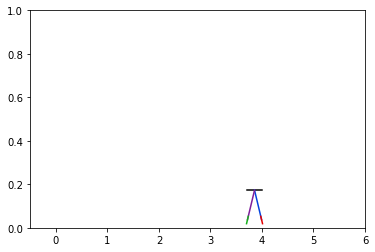

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML
%matplotlib inline

fig1, ax1 = plt.subplots(1,1) #create axes
#ax1.set_aspect('equal')
p = 0
adder = 0
def plot_robot(i,m,ax): #update function for animation
    global p, adder
    ax.clear()
    ax.set_xlim([-0.5,6])
    ax.set_ylim([0,1])
    
    if(i%(N+1) == 0):
        i += 1
        p += 1
        if(p>0):
            adder += m[p-1].q0[N,'x'].value
    
    #plot body
#     body_xb = m[p].q0[i%(N+1),'x'].value - 0.5*m[p].lb*np.cos(m[p].q0[i%(N+1),'theta_b'].value) + adder
#     body_yb = m[p].q0[i%(N+1),'z'].value - 0.5*m[p].lb*np.sin(m[p].q0[i%(N+1),'theta_b'].value)
#     body_xf = m[p].q0[i%(N+1),'x'].value + 0.5*m[p].lb*np.cos(m[p].q0[i%(N+1),'theta_b'].value) + adder
#     body_yf = m[p].q0[i%(N+1),'z'].value + 0.5*m[p].lb*np.sin(m[p].q0[i%(N+1),'theta_b'].value)  
#     ax.plot([body_xb,body_xf],[body_yb,body_yf],color='xkcd:black')
    body_xb = m[p].q0[i%(N+1),'x'].value - 0.5*m[p].lb*np.cos(0) + adder
    body_yb = m[p].q0[i%(N+1),'z'].value - 0.5*m[p].lb*np.sin(0)
    body_xf = m[p].q0[i%(N+1),'x'].value + 0.5*m[p].lb*np.cos(0) + adder
    body_yf = m[p].q0[i%(N+1),'z'].value + 0.5*m[p].lb*np.sin(0)  
    ax.plot([body_xb,body_xf],[body_yb,body_yf],color='xkcd:black')

    # left--------------------------------------------------------------------------------------------------
    #plot leg 
    leg_xt1_L = m[p].q0[i%(N+1),'x'].value + adder
    leg_yt1_L = m[p].q0[i%(N+1),'z'].value 
    leg_xb1_L = m[p].q0[i%(N+1),'x'].value + m[p].ll1*np.cos(m[p].q0[i%(N+1),'theta_l_L'].value) + adder
    leg_yb1_L = m[p].q0[i%(N+1),'z'].value - m[p].ll1*np.sin(m[p].q0[i%(N+1),'theta_l_L'].value)
    ax.plot([leg_xt1_L,leg_xb1_L],[leg_yt1_L,leg_yb1_L],color='xkcd:blue')

    #plot leg 
    leg_xt2_L = m[p].q0[i%(N+1),'x'].value + m[p].ll2*np.cos(m[p].q0[i%(N+1),'theta_l_L'].value) + adder
    leg_yt2_L = m[p].q0[i%(N+1),'z'].value - m[p].ll2*np.sin(m[p].q0[i%(N+1),'theta_l_L'].value)
    leg_xb2_L = m[p].q0[i%(N+1),'x'].value + (m[p].ll2 + m[p].q0[i%(N+1),'r_L'].value)*np.cos(m[p].q0[i%(N+1),'theta_l_L'].value) + adder
    leg_yb2_L = m[p].q0[i%(N+1),'z'].value - (m[p].ll2 + m[p].q0[i%(N+1),'r_L'].value)*np.sin(m[p].q0[i%(N+1),'theta_l_L'].value)
    ax.plot([leg_xt2_L,leg_xb2_L],[leg_yt2_L,leg_yb2_L],color='xkcd:red')

    # right---------------------------------------------------------------------------------------------------
    #plot leg 
    leg_xt1_R = m[p].q0[i%(N+1),'x'].value + adder
    leg_yt1_R = m[p].q0[i%(N+1),'z'].value 
    leg_xb1_R = m[p].q0[i%(N+1),'x'].value + m[p].ll1*np.cos(m[p].q0[i%(N+1),'theta_l_R'].value) + adder
    leg_yb1_R = m[p].q0[i%(N+1),'z'].value - m[p].ll1*np.sin(m[p].q0[i%(N+1),'theta_l_R'].value) 
    ax.plot([leg_xt1_R,leg_xb1_R],[leg_yt1_R,leg_yb1_R],color='xkcd:purple')

    #plot leg 
    leg_xt2_R = m[p].q0[i%(N+1),'x'].value + m[p].ll2*np.cos(m[p].q0[i%(N+1),'theta_l_R'].value) + adder
    leg_yt2_R = m[p].q0[i%(N+1),'z'].value - m[p].ll2*np.sin(m[p].q0[i%(N+1),'theta_l_R'].value)
    leg_xb2_R = m[p].q0[i%(N+1),'x'].value + (m[p].ll2 + m[p].q0[i%(N+1),'r_R'].value)*np.cos(m[p].q0[i%(N+1),'theta_l_R'].value) + adder
    leg_yb2_R = m[p].q0[i%(N+1),'z'].value - (m[p].ll2 + m[p].q0[i%(N+1),'r_R'].value)*np.sin(m[p].q0[i%(N+1),'theta_l_R'].value)
    ax.plot([leg_xt2_R,leg_xb2_R],[leg_yt2_R,leg_yb2_R],color='xkcd:green')
    
update = lambda i: plot_robot(i,m,ax1) #lambdify update function

animate = ani.FuncAnimation(fig1,update,range(1,(N+1)*3),interval = 50,repeat=False)

HTML(animate.to_jshtml())
#HTML(animate.to_html5_video())

-135.48269971691485
-135.48269971691485
-135.48269971691485
-135.48269971691485
-135.48269971691485
-135.48269971691485
-123.93573854769579
-123.93573854769579
-123.93573854769579
-123.93573854769579
-123.93573854769579
-123.93573854769579
-123.93565169865859
-123.93565169865859
-123.93565169865859
-123.93565169865859
-123.93565169865859
-123.93565169865859
123.93546617664074
123.93546617664074
123.93546617664074
123.93546617664074
123.93546617664074
123.93546617664074
142.05414830923576
142.05414830923576
142.05414830923576
142.05414830923576
142.05414830923576
142.05414830923576
-18.0322683969025
-18.0322683969025
-18.0322683969025
-18.0322683969025
-18.0322683969025
-18.0322683969025
-123.9354699582836
-123.9354699582836
-123.9354699582836
-123.9354699582836
-123.9354699582836
-123.9354699582836
159.9999842211937
159.9999842211937
159.9999842211937
159.9999842211937
159.9999842211937
159.9999842211937
160.0
160.0
160.0
160.0
160.0
160.0
-1.1590794245337932
-1.1590794245337932
-1.159

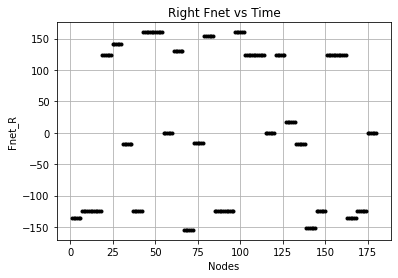

-123.93643987248072
-123.93643987248072
-123.93643987248072
-123.93643987248072
-123.93643987248072
-123.93643987248072
-123.93576942925031
-123.93576942925031
-123.93576942925031
-123.93576942925031
-123.93576942925031
-123.93576942925031
-123.93581360957556
-123.93581360957556
-123.93581360957556
-123.93581360957556
-123.93581360957556
-123.93581360957556
141.26799079507248
141.26799079507248
141.26799079507248
141.26799079507248
141.26799079507248
141.26799079507248
123.93547461101306
123.93547461101306
123.93547461101306
123.93547461101306
123.93547461101306
123.93547461101306
-123.93555347515016
-123.93555347515016
-123.93555347515016
-123.93555347515016
-123.93555347515016
-123.93555347515016
123.93552953106163
123.93552953106163
123.93552953106163
123.93552953106163
123.93552953106163
123.93552953106163
-8.38214069617599
-8.38214069617599
-8.38214069617599
-8.38214069617599
-8.38214069617599
-8.38214069617599
-123.93546909781749
-123.93546909781749
-123.93546909781749
-123.93546

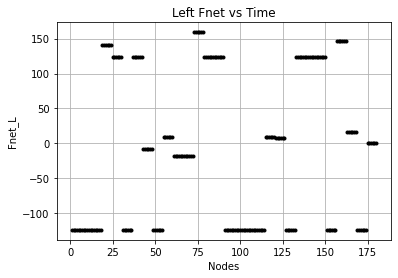

In [4]:
plt.axes()
plt.grid(True)
Time = 0
for i in range(0,3):
    for n in range (1,N+1):
        Fnet_R = m[i].F_max*(m[i].Fbang_pos_R[n].value - m[i].Fbang_neg_R[n].value)# - m[i].dq0[n,'r_R'].value*m[i].damping - m[i].FhardStop_ext_R[n].value + m[i].FhardStop_rtn_R[n].value
        time = m[i].tt0[n].value
        Time += time
        print(Fnet_R)
        plt.plot(N*i+n,Fnet_R,'k.')
        plt.xlabel('Nodes')
        plt.ylabel('Fnet_R')
        plt.title('Right Fnet vs Time')
plt.show()

plt.axes()
plt.grid(True)
Time = 0
for i in range(0,3):
    for n in range (1,N+1):
        Fnet_L = m[i].F_max*(m[i].Fbang_pos_L[n].value - m[i].Fbang_neg_L[n].value) #- m[i].dq0[n,'r_L'].value*m[i].damping - m[i].FhardStop_ext_L[n].value + m[i].FhardStop_rtn_L[n].value
        time = m[i].tt0[n].value
        Time += time
        print(Fnet_L)
        plt.plot(N*i+n,Fnet_L,'k.')
        plt.xlabel('Nodes')
        plt.ylabel('Fnet_L')
        plt.title('Left Fnet vs Time')
plt.show()

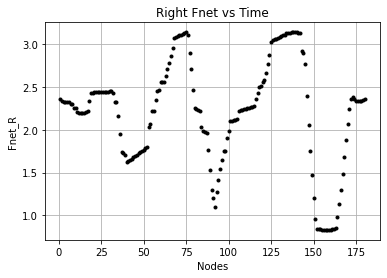

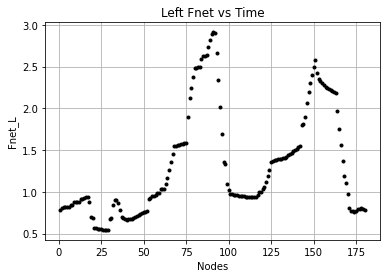

In [5]:
plt.axes()
plt.grid(True)
Time = 0
for i in range(0,3):
    for n in range (1,N+1):
        Fnet_R = m[i].q0[n, 'theta_l_R'].value
        time = m[i].tt0[n].value
        Time += time
        plt.plot(N*i+n,Fnet_R,'k.')
        plt.xlabel('Nodes')
        plt.ylabel('Fnet_R')
        plt.title('Right Fnet vs Time')
plt.show()

plt.axes()
plt.grid(True)
Time = 0
for i in range(0,3):
    for n in range (1,N+1):
        Fnet_L = m[i].q0[n, 'theta_l_L'].value
        time = m[i].tt0[n].value
        Time += time
        plt.plot(N*i+n,Fnet_L,'k.')
        plt.xlabel('Nodes')
        plt.ylabel('Fnet_L')
        plt.title('Left Fnet vs Time')
plt.show()